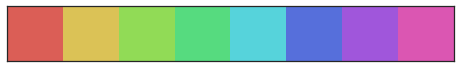

In [169]:
import pandas as pd
import numpy as np
import pickle
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
sns.palplot(sns.color_palette("hls", 8))

### Read in data

In [196]:
df = pd.read_pickle('../players/player_stats.pkl')

In [197]:
# df.info()

In [198]:
# df.describe()

### Bag o' functions

In [199]:
def drop_cols(df):
    df = df.drop(['G', 'GS', 'MP'], axis=1)
    return df

In [200]:
def players2018(df):
    df = df[df['Season'] == 2018]
    return df

In [201]:
def players2017(df):
    df = df[df['Season'] == 2017]
    return df

In [202]:
def players2016(df):
    df = df[df['Season'] == 2016]
    return df

In [203]:
def players2015(df):
    df = df[df['Season'] == 2015]
    return df

In [204]:
def players2014(df):
    df = df[df['Season'] == 2014]
    return df

In [205]:
def cluster_matrix(df):
#     df = df.iloc[:, 0:25]
    player = df['Player'].as_matrix()
    position = df['Pos'].as_matrix()
    X = df.iloc[:, 1:].drop(['Season', 'Team', 'Pos', 'Class', 'Height'], axis=1).as_matrix()
    return X, player, position

In [206]:
def cluster_matrix_reduced(df):
#     df = df.iloc[:, 0:25]
    player = df['Player'].as_matrix()
    position = df['Pos'].as_matrix()
    X_r = df.iloc[:, 1:].drop(['Season', 'Team', 'Pos', 'FG%', '2P%', '3P%', 'FT%', 'PF', 'Height', 'Class', 'FGA', 'FG', '2PA', '3PA', 'FT', 'FTA', 'ORtg', 'DRtg', '2P'], axis=1).as_matrix()
    return X_r, player, position

### Create df and X, y matricies

In [207]:
df.columns

Index(['Player', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P',
       '3PA', '3P%', 'FT', 'FTA', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'ORtg', 'DRtg', 'Team', 'Season', 'Class', 'Pos',
       'Height'],
      dtype='object')

In [208]:
df = drop_cols(df)
players2018 = players2018(df)
players2017 = players2017(df)
players2016 = players2016(df)
players2015 = players2015(df)
players2014 = players2014(df)

In [209]:
players2018.Pos.value_counts()

G     1641
F      856
C       75
PG       9
SF       3
PF       2
SG       1
Name: Pos, dtype: int64

In [210]:
players2017.Pos.value_counts()

G    1749
F     855
C      73
Name: Pos, dtype: int64

In [211]:
players2016.Pos.value_counts()

G    1741
F     852
C      69
Name: Pos, dtype: int64

In [212]:
players2015.Pos.value_counts()

G    1731
F     804
C      79
Name: Pos, dtype: int64

In [213]:
players2014.Pos.value_counts()

G    1660
F     825
C      70
Name: Pos, dtype: int64

In [189]:
players2018.head()

,Player,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,...,TOV,PF,PTS,ORtg,DRtg,Team,Season,Class,Pos,Height
19124,Jalone Friday,12.6,27.6,0.456,9.0,17.1,0.528,3.6,10.6,0.341,...,4.1,8.8,33.4,102.5,97.8,abilene-christian,2018,1.0,C,81.0
19125,Jaren Lewis,8.9,16.3,0.546,8.2,14.3,0.573,0.7,2.0,0.361,...,4.2,4.3,23.6,113.6,96.2,abilene-christian,2018,1.0,G,78.0
19126,Tevin Foster,6.6,15.7,0.419,4.1,7.9,0.521,2.5,7.8,0.317,...,4.5,4.0,21.3,105.6,102.2,abilene-christian,2018,1.0,G,71.0
19127,Hayden Howell,8.6,16.3,0.526,7.9,14.2,0.554,0.7,2.1,0.333,...,4.6,9.9,20.9,97.9,102.1,abilene-christian,2018,1.0,F,79.0
19129,Hayden Farquhar,7.8,20.7,0.378,4.8,7.6,0.634,3.0,13.0,0.229,...,3.4,7.5,20.5,91.9,95.3,abilene-christian,2018,1.0,F,79.0


In [12]:
X, player, position  = cluster_matrix(players2018)
X_r, player_r, position_r  = cluster_matrix_reduced(players2018)

In [13]:
X.shape

(2587, 21)

In [14]:
X_r.shape

(2587, 7)

In [15]:
cols = players2018.columns.tolist()
cols

['Player',
 'FG',
 'FGA',
 'FG%',
 '2P',
 '2PA',
 '2P%',
 '3P',
 '3PA',
 '3P%',
 'FT',
 'FTA',
 'FT%',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'ORtg',
 'DRtg',
 'Team',
 'Season',
 'Class',
 'Pos',
 'Height']

In [16]:
X_cols = cols.copy()
X_cols.remove('Player')  
X_cols.remove('Team')
X_cols.remove('Season')
X_cols.remove('Pos')
X_cols.remove('Class')
X_cols.remove('Height')

In [17]:
X_cols

['FG',
 'FGA',
 'FG%',
 '2P',
 '2PA',
 '2P%',
 '3P',
 '3PA',
 '3P%',
 'FT',
 'FTA',
 'FT%',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'ORtg',
 'DRtg']

In [153]:
X_r_cols = cols.copy()
X_r_cols.remove('Player')  
X_r_cols.remove('Team')
X_r_cols.remove('Season')
X_r_cols.remove('Pos')
X_r_cols.remove('FG%')
X_r_cols.remove('2P%')
X_r_cols.remove('3P%')
X_r_cols.remove('FT%')
X_r_cols.remove('PF')
X_r_cols.remove('Height')
X_r_cols.remove('Class')
X_r_cols.remove('FGA')
X_r_cols.remove('FG')
X_r_cols.remove('3PA')
X_r_cols.remove('FT')
X_r_cols.remove('FTA')
X_r_cols.remove('ORtg')
X_r_cols.remove('DRtg')
X_r_cols.remove('2P')
X_r_cols.remove('2PA')

In [154]:
X_r_cols

['3P', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS']

### Standardize

In [19]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

scale_r = StandardScaler()
X_r_scaled = scale_r.fit_transform(X_r)

## PCA

In [20]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [21]:
pca_r = PCA(n_components=2)
X_r_pca = pca.fit_transform(X_r_scaled)

In [22]:
# pca_comp = pca.explained_variance_ratio_
# pca_r_comp = pca_r.explained_variance_ratio_
# print('full var ratio: {}, {}\nreduced var ratio: {}, {}'.format(pca_comp[0], pca_comp[1], pca_r_comp[0], pca_r_comp[1]))
# pca_comp[1]

In [23]:
X_pca.shape

(2587, 2)

In [24]:
X_r_pca.shape

(2587, 2)

In [25]:
X_pca_df = pd.DataFrame(X_pca, columns=['x','y'])
X_r_pca_df = pd.DataFrame(X_pca, columns=['x','y'])

In [26]:
X_pca_df.head()

,x,y
0,4.417574,-0.681282
1,3.273998,0.814800
2,-0.226433,-1.357334
3,2.070532,2.501526
4,0.136189,1.010855


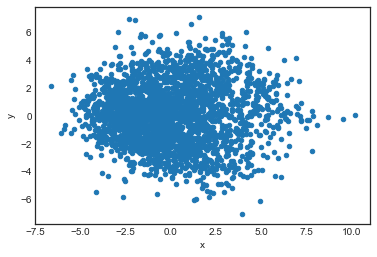

In [27]:
#plot data with seaborn
# facet = sns.lmplot(data=X_reduced_df, x='x', y='y', hue='label', fit_reg=False, legend=True, legend_out=True)
X_pca_df.plot.scatter(x='x', y='y');

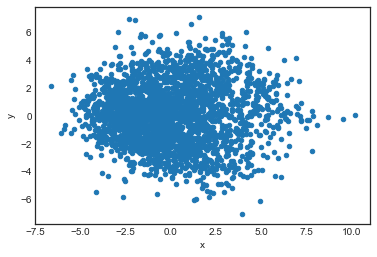

In [28]:
X_r_pca_df.plot.scatter(x='x', y='y');

## t-SNE

In [29]:
tSNE = TSNE(n_components=2)
X_tSNE = tSNE.fit_transform(X_scaled)

In [30]:
tSNE_r = TSNE(n_components=2)
X_r_tSNE = tSNE.fit_transform(X_r_scaled)

In [31]:
tSNE.kl_divergence_

1.585109829902649

In [32]:
X_tSNE.shape

(2587, 2)

In [33]:
X_tSNE_df = pd.DataFrame(X_tSNE, columns=['x','y'])
X_r_tSNE_df = pd.DataFrame(X_r_tSNE, columns=['x','y'])

In [34]:
X_tSNE_df.head()

,x,y
0,57.249214,2.653785
1,37.671150,-4.494993
2,-6.006311,-15.618855
3,25.050419,17.851139
4,8.630574,14.981833


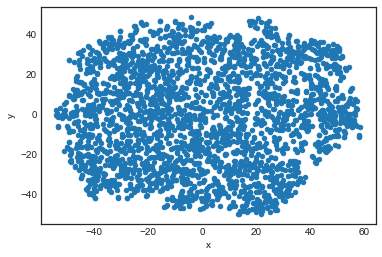

In [35]:
X_tSNE_df.plot.scatter(x='x', y='y');

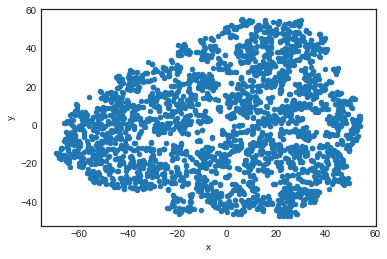

In [36]:
X_r_tSNE_df.plot.scatter(x='x', y='y');

## SVD

In [37]:
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_scaled)

In [38]:
svd.explained_variance_ratio_

array([0.30330394, 0.21785673])

In [39]:
X_svd.shape

(2587, 2)

In [40]:
X_svd_df = pd.DataFrame(X_svd, columns=['x','y'])

In [41]:
X_svd_df.head()

,x,y
0,4.417574,-0.681284
1,3.273998,0.814800
2,-0.226433,-1.357335
3,2.070532,2.501525
4,0.136189,1.010856


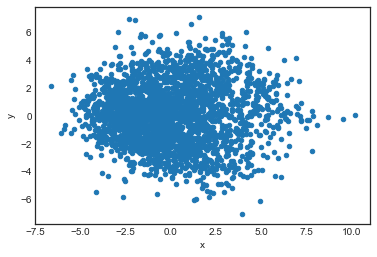

In [42]:
X_svd_df.plot.scatter(x='x', y='y');

## Linear Discriminant Analysis (LDA)

In [114]:
X_scaled.shape

(2587, 21)

In [115]:
position.shape

(2587,)

In [43]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, position)

In [44]:
lda_r = LDA(n_components=2)
X_r_lda = lda_r.fit_transform(X_r_scaled, position_r)

In [45]:
X_lda_df = pd.DataFrame(X_lda, columns=['x','y'])
X_r_lda_df = pd.DataFrame(X_r_lda, columns=['x','y'])

In [46]:
X_lda_df.shape

(2587, 2)

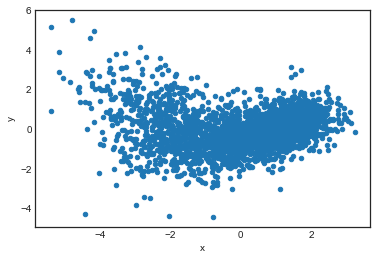

In [47]:
X_lda_df.plot.scatter(x='x', y='y');

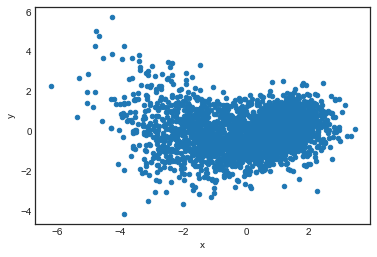

In [48]:
X_r_lda_df.plot.scatter(x='x', y='y');

## KMeans

In [49]:
kmeans = KMeans(n_clusters=6, init='k-means++', n_init=20, max_iter=500, tol=0.0001,
                        precompute_distances='auto', verbose=0, random_state=None,
                        copy_x=True, n_jobs=1, algorithm='auto')
kmeans.fit(X_scaled);

In [50]:
kmeans_r = KMeans(n_clusters=6, init='k-means++', n_init=20, max_iter=500, tol=0.0001,
                        precompute_distances='auto', verbose=0, random_state=None,
                        copy_x=True, n_jobs=1, algorithm='auto')
kmeans_r.fit(X_r_scaled);

In [51]:
kmeans.inertia_/10000

3.070531885594642

In [52]:
cluster_centers = kmeans.cluster_centers_ 

In [53]:
clusters = kmeans.labels_
clusters_r = kmeans_r.labels_

In [54]:
clusters = np.asmatrix(clusters)

In [55]:
clusters.shape

(1, 2587)

In [56]:
clusters_df = pd.DataFrame(np.concatenate((X, clusters.T), axis=1))

In [131]:
cluster_cols = X_cols.copy()
cluster_cols.append('Cluster')

In [58]:
clusters_df.columns = cluster_cols

In [59]:
clusters_df.groupby('Cluster').mean().round(2)

,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,...,FT%,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg
Cluster,,,,,,,,,,,,,,,,,,,,,
0.0,4.58,12.02,0.38,2.61,5.97,0.44,1.97,6.05,0.32,2.14,...,0.68,6.99,3.88,1.70,0.51,3.07,5.10,13.26,97.59,107.18
1.0,6.47,13.03,0.50,5.78,10.71,0.55,0.69,2.32,0.22,3.17,...,0.62,12.40,2.30,1.46,1.92,3.27,6.96,16.80,106.07,103.14
2.0,9.89,22.62,0.44,6.50,13.31,0.49,3.38,9.31,0.36,6.32,...,0.79,8.21,4.81,1.98,0.52,4.17,4.08,29.47,110.16,105.34
3.0,6.90,16.55,0.42,4.94,10.59,0.47,1.97,5.95,0.32,4.26,...,0.72,7.54,5.84,2.32,0.46,4.34,4.70,20.03,101.60,104.39
4.0,7.31,17.45,0.42,3.23,6.67,0.48,4.09,10.78,0.38,2.99,...,0.78,7.04,3.26,1.58,0.47,2.61,4.21,21.70,112.11,106.60
5.0,10.41,19.85,0.53,9.47,16.99,0.56,0.95,2.87,0.30,5.63,...,0.70,14.26,2.82,1.56,1.88,3.99,5.88,27.40,112.82,100.88


In [60]:
clusters_df.Cluster.value_counts()

0.0    535
4.0    519
3.0    485
1.0    407
2.0    351
5.0    290
Name: Cluster, dtype: int64

In [61]:
#sorting to get top 10 feature indexes for each centroid
cluster_ind = np.argsort(cluster_centers, axis=1)

top10s = np.array([])
for row in cluster_ind[:,:10]:
    cluster_10s = np.array([])
    for col in row:
        cluster_10s = np.append(cluster_10s, cluster_cols[col])
    top10s = np.append(top10s, cluster_10s)

top10s.reshape(-1,10)

array([['FG', 'PTS', 'FGA', '2P', '2PA', 'FTA', 'FT', 'FG%', 'ORtg',
        '2P%'],
       ['3PA', '3P', '3P%', 'FT%', 'FGA', 'AST', 'PTS', 'STL', 'FT',
        'FG'],
       ['PF', 'BLK', 'TRB', 'FG%', '2P%', 'DRtg', 'STL', '3P%', 'ORtg',
        'AST'],
       ['BLK', 'ORtg', 'TRB', 'FG%', '2P%', 'PF', '3P', 'FG', '3PA',
        'DRtg'],
       ['TOV', '2PA', '2P', 'FTA', 'TRB', 'PF', 'FT', 'BLK', 'AST',
        'FG%'],
       ['3PA', '3P', 'DRtg', 'AST', 'STL', '3P%', 'FT%', 'TOV', 'PF',
        'ORtg']], dtype='<U32')

In [62]:
kmeans.inertia_

30705.31885594642

In [63]:
kmeans.score(X_scaled)

-30705.318855946425

### Elbow Plot

In [64]:
Ks = range(1, 15)
km = [KMeans(n_clusters=i) for i in Ks]
score = [km[i].fit(X_scaled).inertia_/10000 for i in range(len(km))]
score_r = [km[i].fit(X_r_scaled).inertia_/10000 for i in range(len(km))]

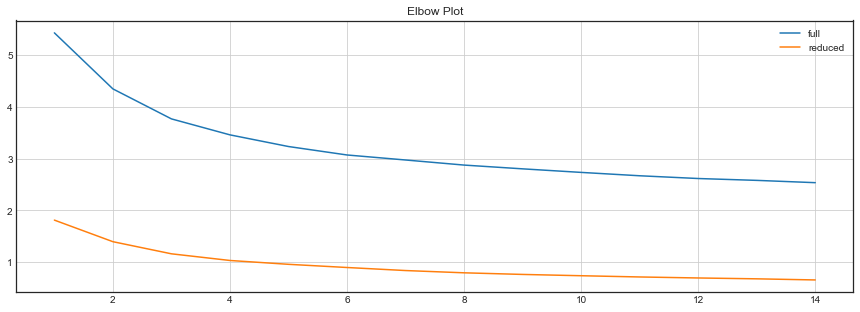

In [65]:
fig = plt.figure(figsize=(15, 5))
plt.plot(Ks, score)
plt.plot(Ks, score_r)
plt.legend(['full', 'reduced'], loc='best')
plt.grid(True)
plt.title('Elbow Plot');

### Silhouette Score

In [66]:
silhouette_score(X_scaled, clusters.T, metric='euclidean')

/Users/sec/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.1235045769995425

In [67]:
Ks = range(2, 19, 1)
km = [KMeans(n_clusters=i) for i in Ks]
sil_score = [silhouette_score(X_scaled, np.asmatrix(km[i].fit(X_scaled).labels_).T) for i in range(len(km))]
sil_score_r = [silhouette_score(X_r_scaled, np.asmatrix(km[i].fit(X_r_scaled).labels_).T) for i in range(len(km))]

/Users/sec/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


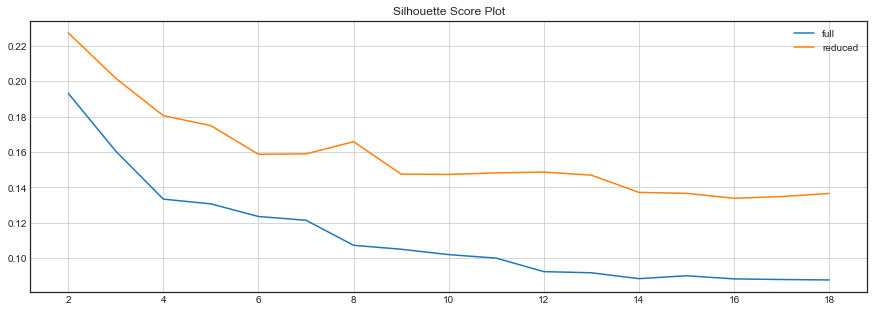

In [68]:
fig = plt.figure(figsize=(15, 5))
plt.plot(Ks, sil_score)
plt.plot(Ks, sil_score_r)
plt.legend(['full', 'reduced'], loc='best')
plt.grid(True)
plt.title('Silhouette Score Plot');

In [69]:
X_lda_df['label'] = clusters.T
X_tSNE_df['label'] = clusters.T
X_lda_df.head()

,x,y,label
0,-3.295946,1.273098,5
1,-0.976119,-0.832797,5
2,2.050793,-0.347236,3
3,-1.898215,-0.038765,1
4,-1.496692,-2.654087,1


In [70]:
X_r_lda_df['label'] = clusters_r
X_r_tSNE_df['label'] = clusters_r
X_r_lda_df.head()

,x,y,label
0,-2.742712,1.571244,2
1,-1.348734,-0.371381,5
2,1.761131,0.508436,1
3,-1.191766,0.110873,5
4,-1.456152,-1.751959,5


### tSNE by cluster

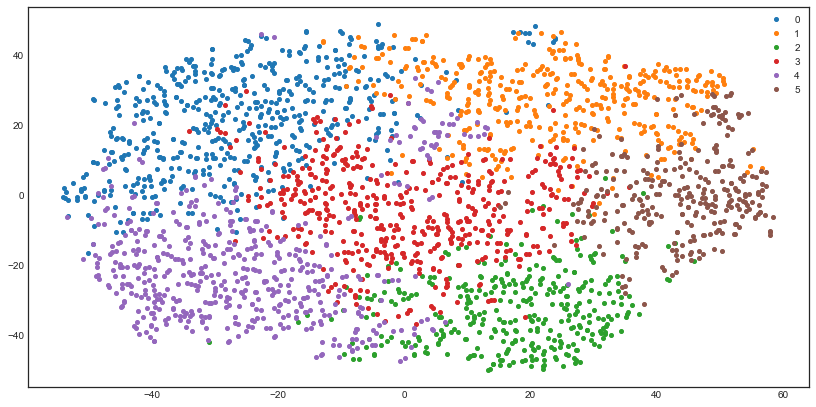

In [71]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)

groups = X_tSNE_df.groupby('label')

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=4, label=name)
ax.legend()

plt.show()

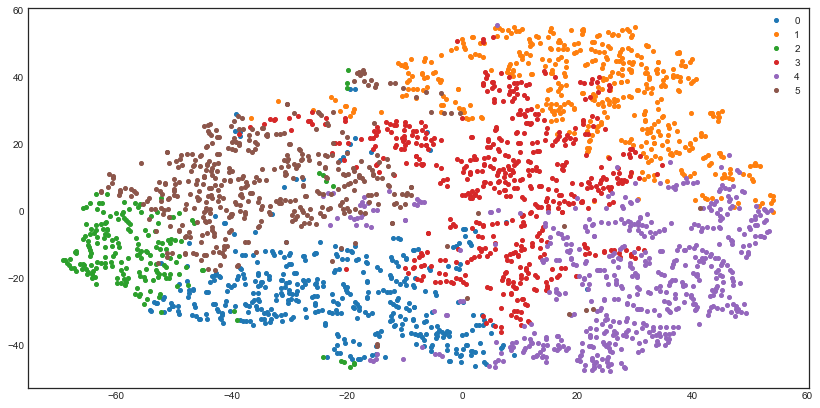

In [72]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)

groups = X_r_tSNE_df.groupby('label')

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=4, label=name)
ax.legend()

plt.show()

### LDA by Cluster

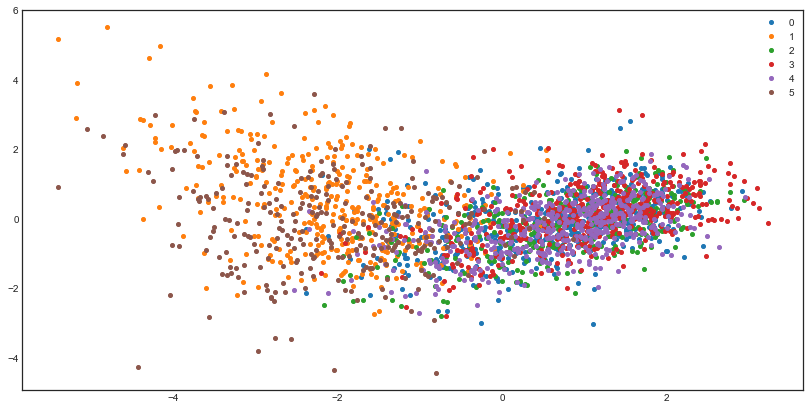

In [73]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)

groups = X_lda_df.groupby('label')

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=4, label=name)
ax.legend()

plt.show();

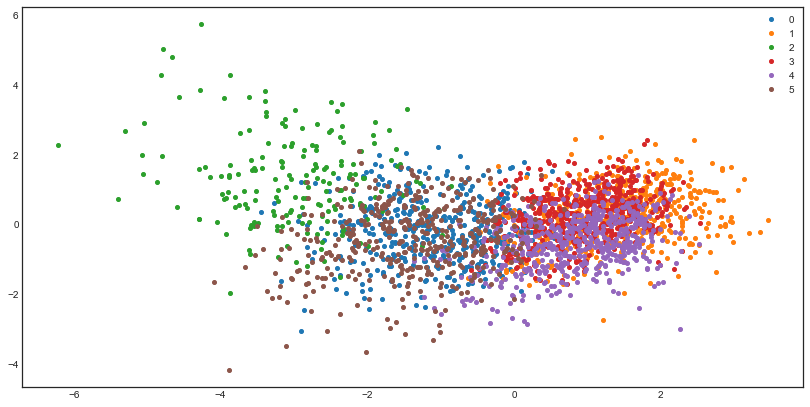

In [74]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)
# x = X_r_lda_df['x']
# y = X_r_lda_df['y']
# lables = X_r_lda_df['label']

groups = X_r_lda_df.groupby('label')

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=4, label=name)
ax.legend()

plt.show();

In [75]:
def lda_3dscatter(X, y):
    lda = LDA(n_components=3)
    lda_features = lda.fit_transform(X, y)
    fig = plt.figure(figsize=(14,14))
    ax = fig.add_subplot(111,projection='3d')
    ax.scatter(lda_features[:, 0], lda_features[:, 1], lda_features[:, 2])
    plt.title('3-Dimensional LDA Plot')

In [76]:
lda3d = LDA(n_components=3)
X_lda_3d = lda3d.fit_transform(X_scaled, position)

In [77]:
lda3d_r = LDA(n_components=3)
X_r_lda_3d = lda3d_r.fit_transform(X_r_scaled, position)

In [78]:
X_lda3d_df = pd.DataFrame(X_lda_3d, columns=['x','y', 'z'])
X_r_lda3d_df = pd.DataFrame(X_r_lda_3d, columns=['x','y','z'])
X_lda3d_df['label'] = clusters.T
X_r_lda3d_df['label'] = clusters_r

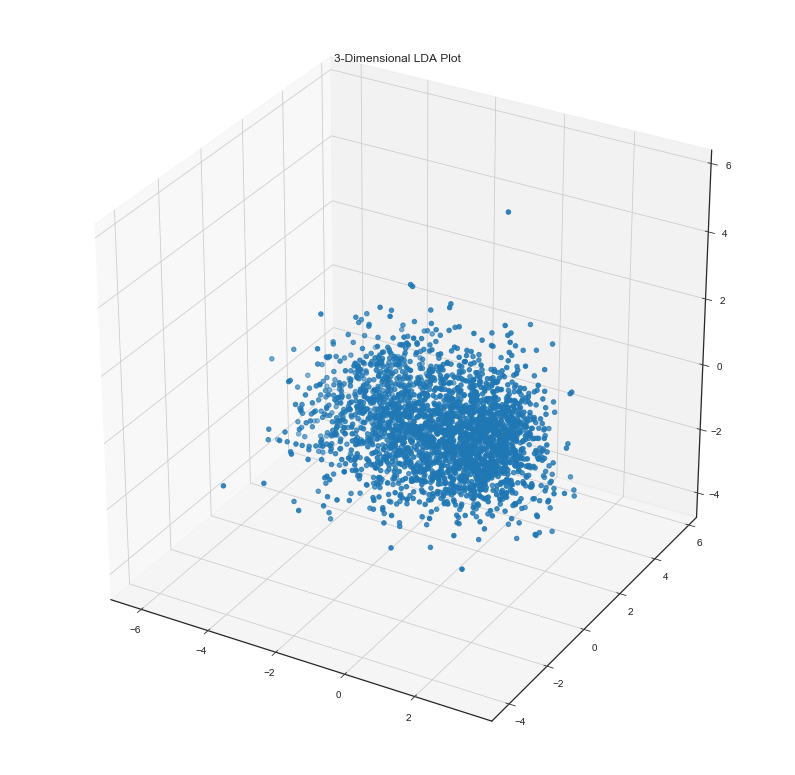

In [79]:
lda_3dscatter(X_r_scaled, position)

In [80]:
# range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# for n_clusters in list(range(2, 13)):
#     # Create a subplot with 1 row and 2 columns
#     fig, (ax1, ax2) = plt.subplots(1, 2)
#     fig.set_size_inches(18, 7)

#     # The 1st subplot is the silhouette plot
#     # The silhouette coefficient can range from -1, 1 but in this example all
#     # lie within [-0.1, 1]
#     ax1.set_xlim([-0.1, 1])
#     # The (n_clusters+1)*10 is for inserting blank space between silhouette
#     # plots of individual clusters, to demarcate them clearly.
#     ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

#     # Initialize the clusterer with n_clusters value and a random generator
#     # seed of 10 for reproducibility.
#     clusterer = KMeans(n_clusters=n_clusters, random_state=10)
#     cluster_labels = clusterer.fit_predict(X_scaled)

#     # The silhouette_score gives the average value for all the samples.
#     # This gives a perspective into the density and separation of the formed
#     # clusters
#     silhouette_avg = silhouette_score(X_scaled, cluster_labels)
#     print("For n_clusters =", n_clusters,
#           "The average silhouette_score is :", silhouette_avg)

#     # Compute the silhouette scores for each sample
#     sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

#     y_lower = 10
#     for i in range(n_clusters):
#         # Aggregate the silhouette scores for samples belonging to
#         # cluster i, and sort them
#         ith_cluster_silhouette_values = \
#             sample_silhouette_values[cluster_labels == i]

#         ith_cluster_silhouette_values.sort()

#         size_cluster_i = ith_cluster_silhouette_values.shape[0]
#         y_upper = y_lower + size_cluster_i

#         color = cm.viridis(float(i) / n_clusters)
#         ax1.fill_betweenx(np.arange(y_lower, y_upper),
#                           0, ith_cluster_silhouette_values,
#                           facecolor=color, edgecolor=color, alpha=0.7)

#         # Label the silhouette plots with their cluster numbers at the middle
#         ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

#         # Compute the new y_lower for next plot
#         y_lower = y_upper + 10  # 10 for the 0 samples

#     ax1.set_title("The silhouette plot for the various clusters.")
#     ax1.set_xlabel("The silhouette coefficient values")
#     ax1.set_ylabel("Cluster label")

#     # The vertical line for average silhouette score of all the values
#     ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

#     ax1.set_yticks([])  # Clear the yaxis labels / ticks
#     ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#     # 2nd Plot showing the actual clusters formed
#     colors = cm.viridis(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
#                 c=colors, edgecolor='k')

#     # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
#                 c="white", alpha=1, s=200, edgecolor='k')

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
#                     s=50, edgecolor='k')

#     ax2.set_title("The visualization of the clustered data.")
#     ax2.set_xlabel("Feature space for the 1st feature")
#     ax2.set_ylabel("Feature space for the 2nd feature")

#     plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
#                   "with n_clusters = %d" % n_clusters),
#                  fontsize=14, fontweight='bold')

#     plt.show()

## DBScan!!! Not working!!!!!

In [81]:
dbscan = DBSCAN(eps=0.1, min_samples=2, metric='euclidean', metric_params=None,
                algorithm='auto', leaf_size=30, p=None, n_jobs=1)
dbscan.fit(X_r_scaled);

In [82]:
len(np.unique(dbscan.labels_))

1

In [83]:
# # Compute DBSCAN
# db = DBSCAN(eps=0.3, min_samples=10).fit(X_scaled)
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
# labels = db.labels_

# # Number of clusters in labels, ignoring noise if present.
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# print('Estimated number of clusters: %d' % n_clusters_)
# # print("Homogeneity: %0.3f" % metrics.homogeneity_score(position, labels))
# # print("Completeness: %0.3f" % metrics.completeness_score(position, labels))
# # print("V-measure: %0.3f" % metrics.v_measure_score(position, labels))
# # print("Adjusted Rand Index: %0.3f"
# #       % metrics.adjusted_rand_score(position, labels))
# # print("Adjusted Mutual Information: %0.3f"
# #       % metrics.adjusted_mutual_info_score(position, labels))
# print("Silhouette Coefficient: %0.3f" % silhouette_score(X_scaled, labels))

# # #############################################################################
# # Plot result
# import matplotlib.pyplot as plt

# # Black removed and is used for noise instead.
# unique_labels = set(labels)
# colors = [plt.cm.viridis(each)
#           for each in np.linspace(0, 1, len(unique_labels))]
# for k, col in zip(unique_labels, colors):
#     if k == -1:
#         # Black used for noise.
#         col = [0, 0, 0, 1]

#     class_member_mask = (labels == k)

#     xy = X[class_member_mask & core_samples_mask]
#     plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
#              markeredgecolor='k', markersize=14)

#     xy = X[class_member_mask & ~core_samples_mask]
#     plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
#              markeredgecolor='k', markersize=6)

# plt.title('Estimated number of clusters: %d' % n_clusters_)
# plt.show()

## Clustering by position

In [84]:
players2018.Pos.value_counts()

G     1641
F      856
C       75
PG       9
SF       3
PF       2
SG       1
Name: Pos, dtype: int64

In [85]:
gaurds2018 = players2018[players2018['Pos'] == 'G']

In [86]:
Xg, gplayer, gposition  = cluster_matrix(gaurds2018)
Xg_r, gplayer_r, gposition_r  = cluster_matrix_reduced(gaurds2018)

In [87]:
gscale = StandardScaler()
gX_scaled = scale.fit_transform(Xg)

gscale_r = StandardScaler()
gX_r_scaled = scale_r.fit_transform(Xg_r)

In [104]:
gKs = range(2, 19, 1)
gkm = [KMeans(n_clusters=i) for i in Ks]
gsil_score = [silhouette_score(gX_scaled, np.asmatrix(km[i].fit(gX_scaled).labels_).T) for i in range(len(gkm))]
gsil_score_r = [silhouette_score(gX_r_scaled, np.asmatrix(km[i].fit(gX_r_scaled).labels_).T) for i in range(len(gkm))]

/Users/sec/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


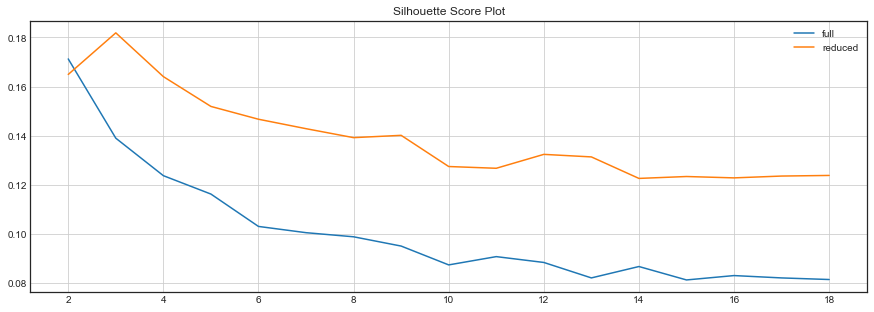

In [89]:
fig = plt.figure(figsize=(15, 5))
plt.plot(gKs, gsil_score)
plt.plot(gKs, gsil_score_r)
plt.legend(['full', 'reduced'], loc='best')
plt.grid(True)
plt.title('Silhouette Score Plot');

In [90]:
gkmeans = KMeans(n_clusters=3, init='k-means++', n_init=20, max_iter=500, tol=0.0001,
                        precompute_distances='auto', verbose=0, random_state=None,
                        copy_x=True, n_jobs=1, algorithm='auto')
gkmeans.fit(gX_scaled);

In [91]:
gkmeans_r = KMeans(n_clusters=3, init='k-means++', n_init=20, max_iter=500, tol=0.0001,
                        precompute_distances='auto', verbose=0, random_state=None,
                        copy_x=True, n_jobs=1, algorithm='auto')
gkmeans_r.fit(gX_r_scaled);

In [92]:
gclusters = gkmeans.labels_
gclusters_r = gkmeans_r.labels_

### tSNE Guards

In [93]:
gtSNE = TSNE(n_components=2)
gX_tSNE = gtSNE.fit_transform(gX_scaled)

In [94]:
gtSNE_r = TSNE(n_components=2)
gX_r_tSNE = gtSNE.fit_transform(gX_r_scaled)

In [95]:
gX_tSNE_df = pd.DataFrame(gX_tSNE, columns=['x','y'])
gX_r_tSNE_df = pd.DataFrame(gX_r_tSNE, columns=['x','y'])

In [96]:
# gX_lda_df['label'] = gclusters
gX_tSNE_df['label'] = gclusters
gX_tSNE_df.head()

,x,y,label
0,-35.968891,-24.164606,1
1,18.009010,-13.736154,1
2,-41.511215,-18.993223,0
3,-32.434673,-7.335083,0
4,15.300846,27.298386,2


In [97]:
# gX_r_lda_df['label'] = gclusters_r
gX_r_tSNE_df['label'] = gclusters_r
gX_r_tSNE_df.head()

,x,y,label
0,-0.452618,48.947742,1
1,-21.035234,-12.105500,0
2,4.342856,46.997078,1
3,-34.570889,-4.852567,0
4,-2.715090,-11.095288,2


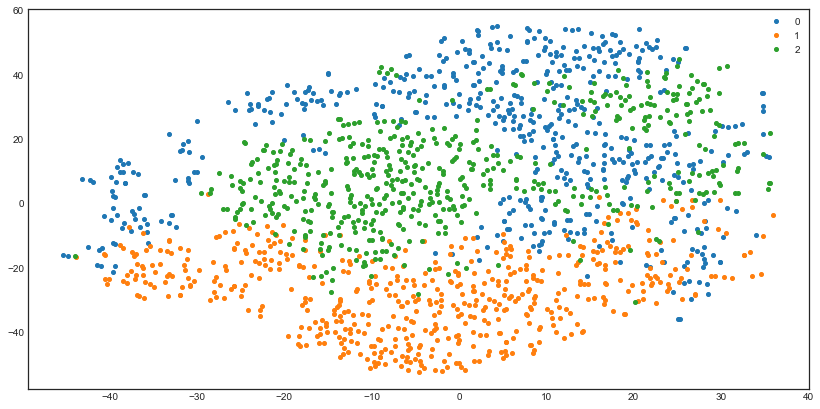

In [98]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)

groups = gX_tSNE_df.groupby('label')

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=4, label=name)
ax.legend()

plt.show();

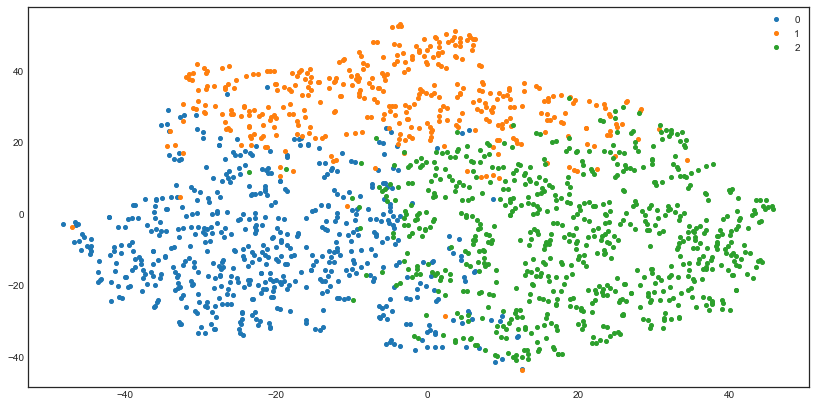

In [102]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)

groups = gX_r_tSNE_df.groupby('label')

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=4, label=name)
ax.legend()

plt.show();

In [133]:
gcluster_centers = gkmeans.cluster_centers_ 
gcluster_cols = X_cols.copy()
gcluster_cols.append('Cluster')

In [134]:
#sorting to get top 10 feature indexes for each centroid
gcluster_ind = np.argsort(gcluster_centers, axis=1)

gtop10s = np.array([])
for row in gcluster_ind[:,:10]:
    gcluster_10s = np.array([])
    for col in row:
        gcluster_10s = np.append(gcluster_10s, gcluster_cols[col])
    gtop10s = np.append(gtop10s, gcluster_10s)

gtop10s.reshape(-1,10)

array([['PTS', '3P', 'FG', '3PA', 'FGA', 'ORtg', '3P%', 'FT%', 'FT',
        'FTA'],
       ['PF', 'DRtg', '3PA', '3P', '3P%', 'BLK', 'STL', 'FT%', 'AST',
        '2P%'],
       ['2PA', '2P', 'TOV', 'FTA', 'FT', 'TRB', 'STL', 'AST', 'PF',
        'BLK']], dtype='<U32')

In [156]:
g_r_cluster_centers = gkmeans_r.cluster_centers_ 
g_r_cluster_cols = X_r_cols.copy()
g_r_cluster_cols.append('Cluster')

In [157]:
g_r_cluster_cols

['3P', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'Cluster']

In [158]:
#sorting to get top 10 feature indexes for each centroid
g_r_cluster_ind = np.argsort(g_r_cluster_centers, axis=1)

g_r_top = np.array([])
for row in g_r_cluster_ind[:,:7]:
    g_r_clusters = np.array([])
    for col in row:
        g_r_clusters = np.append(g_r_clusters, g_r_cluster_cols[col])
    g_r_top = np.append(g_r_top, g_r_clusters)

g_r_top.reshape(-1,7)

array([['BLK', '3P', 'TRB', 'PTS', 'STL', 'TOV', 'AST'],
       ['3P', 'AST', 'PTS', 'TOV', 'STL', 'BLK', 'TRB'],
       ['TOV', 'AST', 'STL', 'TRB', 'BLK', 'PTS', '3P']], dtype='<U32')

Cluster1: Balanced Guards

Cluster2: Scoring Guards

Cluster3: Supporting Gaurds

In [122]:
gtsne_kmeans = KMeans(n_clusters=3, init='k-means++', n_init=20, max_iter=500, tol=0.0001,
                        precompute_distances='auto', verbose=0, random_state=None,
                        copy_x=True, n_jobs=-1, algorithm='auto')
gtsne_kmeans.fit(gX_tSNE);

In [123]:
gtsne_kmeans_r = KMeans(n_clusters=3, init='k-means++', n_init=20, max_iter=500, tol=0.0001,
                        precompute_distances='auto', verbose=0, random_state=None,
                        copy_x=True, n_jobs=1, algorithm='auto')
gtsne_kmeans_r.fit(gX_r_tSNE);

In [124]:
gtsne_clusters = gtsne_kmeans.labels_
gtsne_clusters_r = gtsne_kmeans_r.labels_

In [125]:
gtsne_X_tSNE_df = pd.DataFrame(gX_tSNE, columns=['x','y'])
gtsne_X_r_tSNE_df = pd.DataFrame(gX_r_tSNE, columns=['x','y'])

In [126]:
gtsne_X_tSNE_df['label'] = gtsne_clusters
gtsne_X_r_tSNE_df['label'] = gtsne_clusters_r
gX_r_tSNE_df.head()

,x,y,label
0,-0.452618,48.947742,1
1,-21.035234,-12.105500,0
2,4.342856,46.997078,1
3,-34.570889,-4.852567,0
4,-2.715090,-11.095288,2


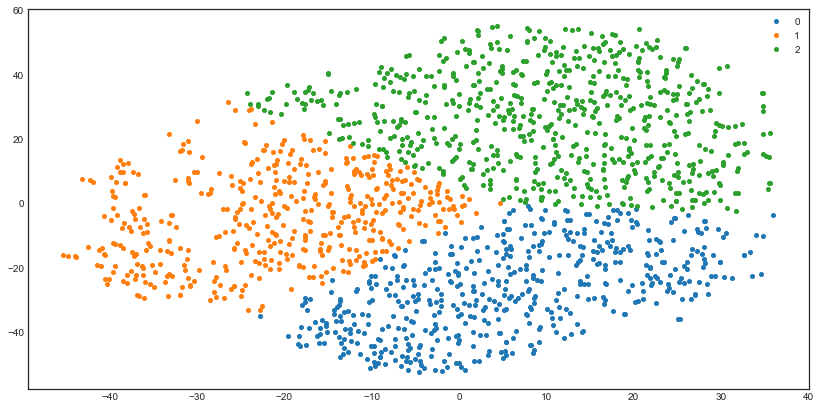

In [127]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)

groups = gtsne_X_tSNE_df.groupby('label')

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=4, label=name)
ax.legend()

plt.show();

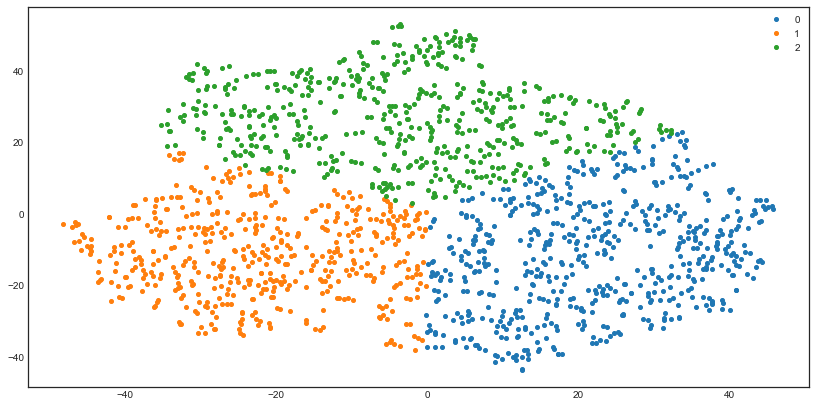

In [128]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)

groups = gtsne_X_r_tSNE_df.groupby('label')

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=4, label=name)
ax.legend()

plt.show();

### Gaurds LDA by cluster

In [117]:
gX_scaled.shape

(1641, 21)

In [99]:
glda = LDA(n_components=2)
gX_lda = glda.fit_transform(gX_scaled, gposition)

/Users/sec/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:402: RuntimeWarning: invalid value encountered in true_divide
  S**2))[:self._max_components]


In [108]:
gX_scaled.shape

(1641, 21)

In [113]:
gposition.shape

(1641,)

In [100]:
glda_r = LDA(n_components=2)
gX_r_lda = glda_r.fit_transform(gX_r_scaled, gposition_r)

/Users/sec/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:402: RuntimeWarning: invalid value encountered in true_divide
  S**2))[:self._max_components]


In [118]:
# gX_lda_df = pd.DataFrame(gX_lda, columns=['x','y'])
# gX_r_lda_df = pd.DataFrame(gX_r_lda, columns=['x','y'])

In [119]:
# fig = plt.figure(figsize=(14,7))
# ax = fig.add_subplot(111)

# groups = gX_lda_df.groupby('label')

# for name, group in groups:
#     ax.plot(group.x, group.y, marker='o', linestyle='', ms=4, label=name)
# ax.legend()

# plt.show();

## Forwards

In [214]:
ftSNE = TSNE(n_components=2)
fX_tSNE = ftSNE.fit_transform(fX_scaled)

NameError: name 'fX_scaled' is not defined